In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
import warnings 

In [111]:
warnings.filterwarnings('ignore') 

In [5]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)

### Data Info

In [6]:
# Data fields
# Here's a brief version of what you'll find in the data description file.

# SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
# MSSubClass: The building class
# MSZoning: The general zoning classification
# LotFrontage: Linear feet of street connected to property
# LotArea: Lot size in square feet
# Street: Type of road access
# Alley: Type of alley access
# LotShape: General shape of property
# LandContour: Flatness of the property
# Utilities: Type of utilities available
# LotConfig: Lot configuration
# LandSlope: Slope of property
# Neighborhood: Physical locations within Ames city limits
# Condition1: Proximity to main road or railroad
# Condition2: Proximity to main road or railroad (if a second is present)
# BldgType: Type of dwelling
# HouseStyle: Style of dwelling
# OverallQual: Overall material and finish quality
# OverallCond: Overall condition rating
# YearBuilt: Original construction date
# YearRemodAdd: Remodel date
# RoofStyle: Type of roof
# RoofMatl: Roof material
# Exterior1st: Exterior covering on house
# Exterior2nd: Exterior covering on house (if more than one material)
# MasVnrType: Masonry veneer type
# MasVnrArea: Masonry veneer area in square feet
# ExterQual: Exterior material quality
# ExterCond: Present condition of the material on the exterior
# Foundation: Type of foundation
# BsmtQual: Height of the basement
# BsmtCond: General condition of the basement
# BsmtExposure: Walkout or garden level basement walls
# BsmtFinType1: Quality of basement finished area
# BsmtFinSF1: Type 1 finished square feet
# BsmtFinType2: Quality of second finished area (if present)
# BsmtFinSF2: Type 2 finished square feet
# BsmtUnfSF: Unfinished square feet of basement area
# TotalBsmtSF: Total square feet of basement area
# Heating: Type of heating
# HeatingQC: Heating quality and condition
# CentralAir: Central air conditioning
# Electrical: Electrical system
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet
# LowQualFinSF: Low quality finished square feet (all floors)
# GrLivArea: Above grade (ground) living area square feet
# BsmtFullBath: Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms
# FullBath: Full bathrooms above grade
# HalfBath: Half baths above grade
# Bedroom: Number of bedrooms above basement level
# Kitchen: Number of kitchens
# KitchenQual: Kitchen quality
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
# Functional: Home functionality rating
# Fireplaces: Number of fireplaces
# FireplaceQu: Fireplace quality
# GarageType: Garage location
# GarageYrBlt: Year garage was built
# GarageFinish: Interior finish of the garage
# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet
# GarageQual: Garage quality
# GarageCond: Garage condition
# PavedDrive: Paved driveway
# WoodDeckSF: Wood deck area in square feet
# OpenPorchSF: Open porch area in square feet
# EnclosedPorch: Enclosed porch area in square feet
# 3SsnPorch: Three season porch area in square feet
# ScreenPorch: Screen porch area in square feet
# PoolArea: Pool area in square feet
# PoolQC: Pool quality
# Fence: Fence quality
# MiscFeature: Miscellaneous feature not covered in other categories
# MiscVal: $Value of miscellaneous feature
# MoSold: Month Sold
# YrSold: Year Sold
# SaleType: Type of sale
# SaleCondition: Condition of sale

In [10]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [11]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [12]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

/home/kg/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

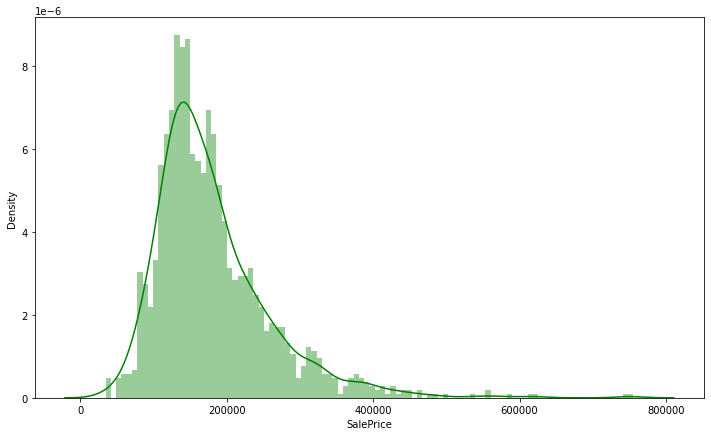

In [35]:
plt.figure(figsize=(12,7))
sns.distplot(df_train["SalePrice"], color='g', bins=100)

In [104]:
df_train_n = df_train.select_dtypes(include=np.number)
df_test_n = df_test.select_dtypes(include=np.number)

In [50]:
corrmat = df_train_n.corr()

<AxesSubplot:>

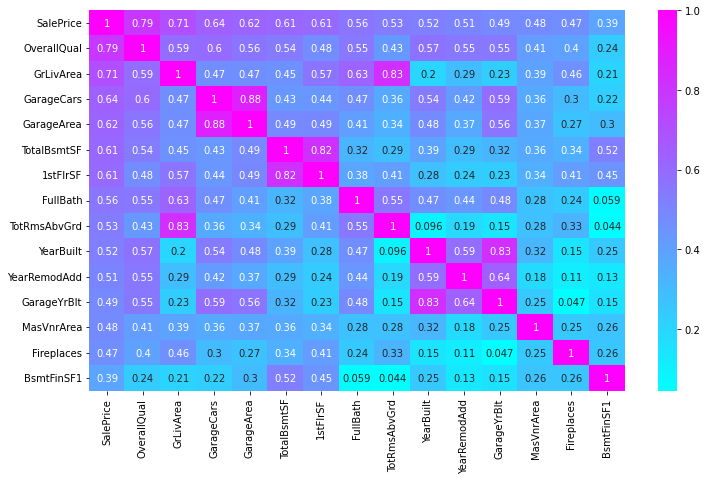

In [72]:
plt.figure(figsize=(12,7))
sns.heatmap(df_train_n[corrmat.nlargest(15,'SalePrice')["SalePrice"].index].corr(),annot=True,cmap='cool')

/home/kg/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/kg/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/kg/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/kg/.local/lib/py

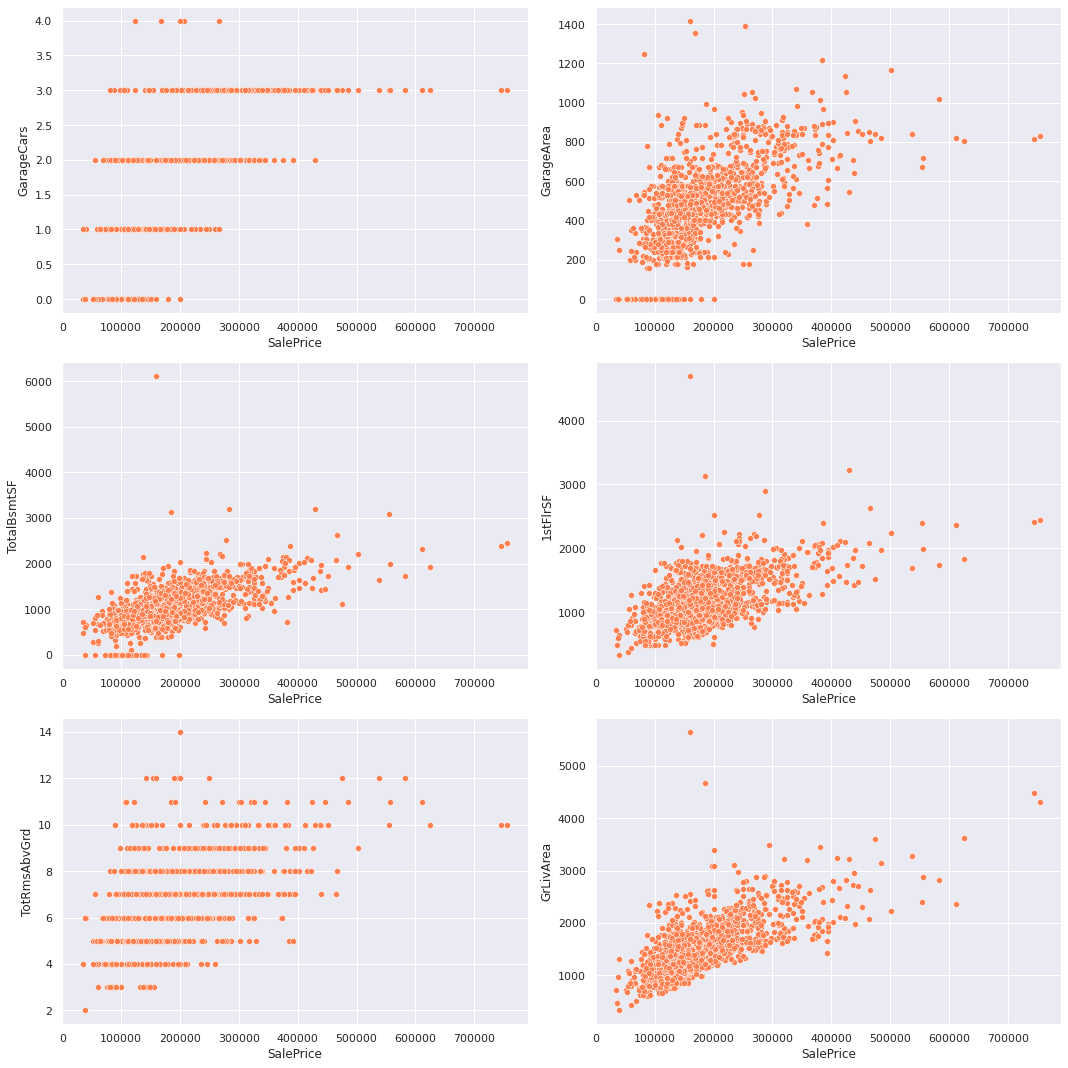

In [109]:
sns.set(style="darkgrid")

fig,ax=plt.subplots(3,2,figsize=(15,15))
sns.scatterplot(df_train_n['SalePrice'],df_train_n['GarageCars'],ax=ax[0][0],color='coral')
sns.scatterplot(df_train_n['SalePrice'],df_train_n['GarageArea'],ax=ax[0][1],color='coral')
sns.scatterplot(df_train_n['SalePrice'],df_train_n['TotalBsmtSF'],ax=ax[1][0],color='coral')
sns.scatterplot(df_train_n['SalePrice'],df_train_n['1stFlrSF'],ax=ax[1][1],color='coral')
sns.scatterplot(df_train_n['SalePrice'],df_train_n['TotRmsAbvGrd'],ax=ax[2][0],color='coral')
sns.scatterplot(df_train_n['SalePrice'],df_train_n['GrLivArea'],ax=ax[2][1],color='coral')
fig.tight_layout()

In [78]:
# Co-linearity:

# We will choose only one feature from each co-linear pair.

# GarageCars and GarageArea
# TotalBsmtSF and 1stFirSF
# TotRmsAbvGrd and GrLIveArea
# I choose GarageArea,TotalBsmtSF,GrLIveArea.I have made this decision by plotting above scatter plots.

In [105]:
df_train_n_1 = df_train_n.drop(["Id","GarageCars","1stFlrSF","TotRmsAbvGrd"],axis=1)
df_test_n_1 = df_test_n.drop(["Id","GarageCars","1stFlrSF","TotRmsAbvGrd"],axis=1)

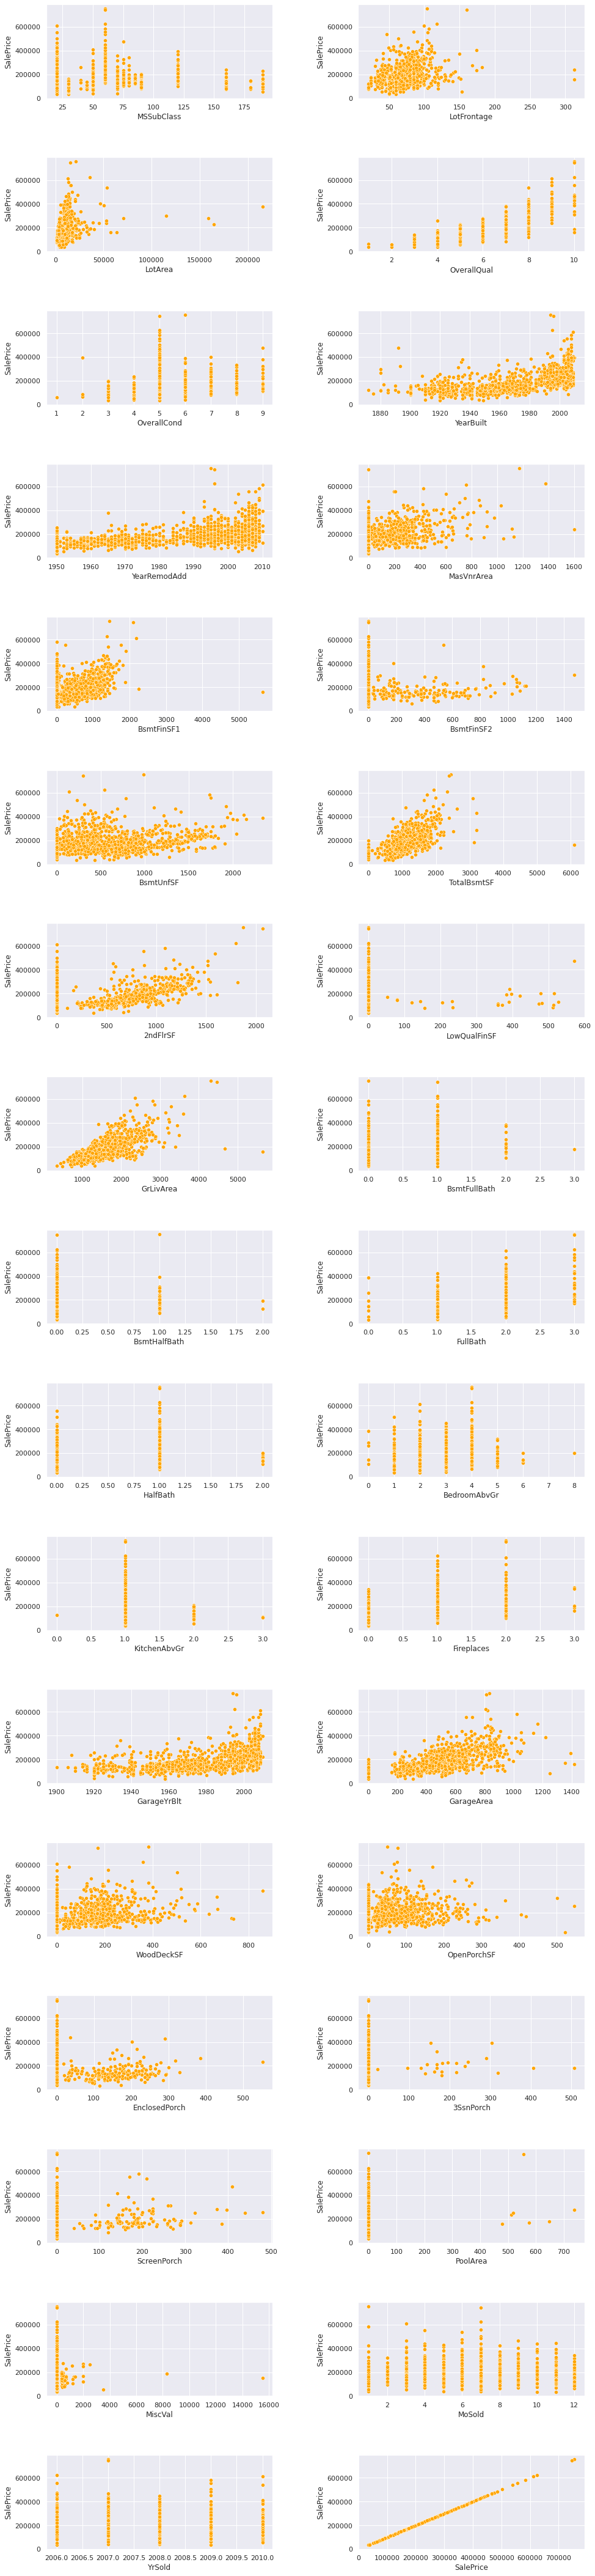

In [112]:
fig,ax=plt.subplots(17,2,figsize=(15,60))
def graph(x,y,r,c,title):
    sns.scatterplot(df_train_n_1[x],y,color=('orange'),ax=ax[r][c])
    ax[r][c].set_xlabel(x)
    fig.tight_layout(pad=5.0)

for r,col in enumerate(df_train_n_1.columns):
    c=r%2
    graph(col,df_train['SalePrice'],r//2,c,col)

### Seperating categorical features from numeric dataset

In [91]:
non_linear=['MSSubClass','LotArea','OverallCond','LowQualFinSF','BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath','BedroomAbvGr',
            'KitchenAbvGr','Fireplaces','3SsnPorch','ScreenPorch' ,'PoolArea','MiscVal','MoSold', 'YrSold']
print("total non-linear",len(non_linear)," columns")


total non-linear 17  columns


In [95]:
linear_columns = [x for x in df_train_n_1.columns if x not in non_linear]

In [163]:
df_train_n_1

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
5             50         85.0    14115            5            5       1993   
6             20         75.0    10084            8            5       2004   
7             60          NaN    10382            7            6       1973   
8             50         51.0     6120            7            5       1931   
9            190         50.0     7420            5            6       1939   
10            20         70.0    11200            5            5       1965   
11            60         85.0    11924            9            5       2005   
12            20          NaN    12968            5            6       1962   
13            20         91.0    10652            7            5       2006   
14            20          NaN    10920            6            5       1960   
15            45         51.0     6120            7            8       1929   
16            20          NaN    11241            6            7       1970   
17            90         72.0    10791            4            5       1967   
18            20         66.0    13695            5            5       2004   
19            20         70.0     7560            5            6       1958   
20            60        101.0    14215            8            5       2005   
21            45         57.0     7449            7            7       1930   
22            20         75.0     9742            8            5       2002   
23           120         44.0     4224            5            7       1976   
24            20          NaN     8246            5            8       1968   
25            20        110.0    14230            8            5       2007   
26            20         60.0     7200            5            7       1951   
27            20         98.0    11478            8            5       2007   
28            20         47.0    16321            5            6       1957   
29            30         60.0     6324            4            6       1927   
30            70         50.0     8500            4            4       1920   
31            20          NaN     8544            5            6       1966   
32            20         85.0    11049            8            5       2007   
33            20         70.0    10552            5            5       1959   
34           120         60.0     7313            9            5       2005   
35            60        108.0    13418            8            5       2004   
36            20        112.0    10859            5            5       1994   
37            20         74.0     8532            5            6       1954   
38            20         68.0     7922            5            7       1953   
39            90         65.0     6040            4            5       1955   
40            20         84.0     8658            6            5       1965   
41            20        115.0    16905            5            6       1959   
42            85          NaN     9180            5            7       1983   
43            20          NaN     9200            5            6       1975   
44            20         70.0     7945            5            6       1959   
45           120         61.0     7658            9            5       2005   
46            50         48.0    12822            7            5       2003   
47            20         84.0    11096            8            5       2006   
48           190         33.0     4456            4            5       1920   
49            20         66.0     7742            5     

In [107]:
df_train_n_1.isnull().sum()[df_train_n_1.isnull().sum()!=0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [106]:
df_test_n_1.isnull().sum()[df_test_n_1.isnull().sum()!=0]

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageArea        1
dtype: int64

In [115]:
df_train_linear = df_train_n_1[linear_columns]

In [157]:
df_train_linear.head()

LotFrontage  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  \
0         65.0            7       2003          2003       196.0          856   
1         80.0            6       1976          1976         0.0         1262   
2         68.0            7       2001          2002       162.0          920   
3         60.0            7       1915          1970         0.0          756   
4         84.0            8       2000          2000       350.0         1145   

   2ndFlrSF  GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  SalePrice  \
0       854       1710       2003.0         548           0     208500   
1         0       1262       1976.0         460         298     181500   
2       866       1786       2001.0         608           0     223500   
3       756       1717       1998.0         642           0     140000   
4      1053       2198       2000.0         836         192     250000   

   TotalPorch  
0          61  
1           0  
2          42  
3         307  
4          84

In [137]:
df_train_linear["LotFrontage"] = df_train_linear["LotFrontage"].fillna(df_train_linear["LotFrontage"].mean())
df_train_linear["MasVnrArea"] = df_train_linear["MasVnrArea"].fillna(df_train_linear["MasVnrArea"].mean())
df_train_linear["GarageYrBlt"] = df_train_linear["GarageYrBlt"].fillna(df_train_linear["GarageYrBlt"].mean())

In [145]:
df_train_linear["TotalPorch"] = df_train_linear["OpenPorchSF"]+df_train_linear["EnclosedPorch"]

In [147]:
df_train_linear.drop(["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","OpenPorchSF","EnclosedPorch"],axis=1,inplace=True)

In [158]:
from sklearn.preprocessing import RobustScaler

In [159]:
r_scaler = RobustScaler()

In [161]:
df_train_linear_scaled = r_scaler.fit_transform(df_train_linear)

In [223]:
df_train_linear_scaled = pd.DataFrame(df_train_linear_scaled,columns=df_train_linear.columns)

In [165]:
df_train_nonlinear = df_train_n_1[non_linear]

In [182]:
df_train_nonlinear

MSSubClass  LotArea  OverallCond  LowQualFinSF  BsmtFullBath  \
0             60     8450            5             0             1   
1             20     9600            8             0             0   
2             60    11250            5             0             1   
3             70     9550            5             0             1   
4             60    14260            5             0             1   
5             50    14115            5             0             1   
6             20    10084            5             0             1   
7             60    10382            6             0             1   
8             50     6120            5             0             0   
9            190     7420            6             0             1   
10            20    11200            5             0             1   
11            60    11924            5             0             1   
12            20    12968            6             0             1   
13            20    10652            5             0             0   
14            20    10920            5             0             1   
15            45     6120            8             0             0   
16            20    11241            7             0             1   
17            90    10791            5             0             0   
18            20    13695            5             0             1   
19            20     7560            6             0             0   
20            60    14215            5             0             0   
21            45     7449            7             0             0   
22            20     9742            5             0             0   
23           120     4224            7             0             1   
24            20     8246            8             0             1   
25            20    14230            5             0             0   
26            20     7200            7             0             0   
27            20    11478            5             0             1   
28            20    16321            6             0             1   
29            30     6324            6             0             0   
30            70     8500            4             0             0   
31            20     8544            6             0             0   
32            20    11049            5             0             0   
33            20    10552            5             0             0   
34           120     7313            5             0             1   
35            60    13418            5             0             0   
36            20    10859            5             0             0   
37            20     8532            6             0             0   
38            20     7922            7             0             1   
39            90     6040            5             0             0   
40            20     8658            5             0             0   
41            20    16905            6             0             0   
42            85     9180            7             0             1   
43            20     9200            6             0             1   
44            20     7945            6             0             1   
45           120     7658            5             0             1   
46            50    12822            5             0             1   
47            20    11096            5             0             0   
48           190     4456            5             0             0   
49            20     7742            7             0             1   
50            60    13869            6             0             0   
51            50     6240            6           360             0   
52            90     8472            5             0             1   
53            20    50271            5             0             2   
54            80     7134            5             0             0   
55            20    10175            5             0             0   
56           160

In [190]:
df_train_cat = df_train.select_dtypes(include=np.object)

In [218]:
len(df_train_cat.columns)

38

In [219]:
df_train_cat.isna().sum()[df_train_cat.isna().sum() != 0]

Series([], dtype: int64)

In [204]:
df_train_cat = df_train_cat.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1)

In [210]:
df_train_cat['MasVnrType']=df_train_cat['MasVnrType'].fillna(method='ffill')
df_train_cat['BsmtQual']=df_train_cat['BsmtQual'].fillna(method='ffill')
df_train_cat['BsmtCond']=df_train_cat['BsmtCond'].fillna(method='ffill')
df_train_cat['BsmtExposure']=df_train_cat['BsmtExposure'].fillna(method='ffill')
df_train_cat['BsmtFinType1']=df_train_cat['BsmtFinType1'].fillna(method='ffill')
df_train_cat['BsmtFinType2']=df_train_cat['BsmtFinType2'].fillna(method='ffill')
df_train_cat['Electrical']=df_train_cat['Electrical'].fillna(method='ffill')
df_train_cat['GarageType']=df_train_cat['GarageType'].fillna(method='ffill')
df_train_cat['GarageFinish']=df_train_cat['GarageFinish'].fillna(method='ffill')
df_train_cat['GarageQual']=df_train_cat['GarageQual'].fillna(method='ffill')
df_train_cat['GarageCond']=df_train_cat['GarageCond'].fillna(method='ffill')

In [212]:
df_train_cat_encoded = pd.get_dummies(df_train_cat)

In [213]:
df_train_cat_1 = pd.concat([df_train_cat_encoded,df_train_nonlinear],axis=1)

In [224]:
df_train_final = pd.concat([df_train_cat_1,df_train_linear_scaled],axis=1)

In [228]:
df_train_final.shape

(1460, 264)

In [229]:
from sklearn.model_selection import train_test_split

In [252]:
X_train,X_test, y_train, y_test = train_test_split(df_train_final.drop("SalePrice",axis=1),df_train_final["SalePrice"],test_size=0.25,random_state=42)


In [253]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error

ridge=Ridge()
parameters= {'alpha':[x for x in [0.1,0.2,0.4,0.5,0.7,0.8,1]]}

ridge_reg=GridSearchCV(ridge, param_grid=parameters)
ridge_reg.fit(X_train,y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)

The best value of Alpha is:  {'alpha': 0.5}


In [257]:
ridge_mod=Ridge(alpha=0.5)
ridge_mod.fit(X_train,y_train)
y_pred_train=ridge_mod.predict(X_train)
y_pred_test=ridge_mod.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test)))) 

Root Mean Square Error train = 0.2574727202928747
Root Mean Square Error test = 0.33081920658248


In [258]:
Lasso_reg =Lasso()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,1]]}

Lasso_reg=GridSearchCV(Lasso_reg, param_grid=parameters)
Lasso_reg.fit(X_train,y_train)
print("The best value of Alpha is: ",Lasso_reg.best_params_,Lasso_reg.best_score_)

The best value of Alpha is:  {'alpha': 0.001} 0.7622832294950785


In [259]:
Lasso_reg =Lasso(alpha=0.001)
Lasso_reg.fit(X_train,y_train)
y_pred_train=Lasso_reg.predict(X_train)
y_pred_test=Lasso_reg.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test)))) 

Root Mean Square Error train = 0.2666622533841137
Root Mean Square Error test = 0.31401566895725125


In [260]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
params = {"max_depth":[15,20,25], "n_estimators":[27,30,33]}
rf_reg = GridSearchCV(rf, params, cv = 10, n_jobs =10)
rf_reg.fit(X_train, y_train)
print(rf_reg.best_estimator_)

RandomForestRegressor(max_depth=20, n_estimators=33)


In [261]:
best_estimator=rf_reg.best_estimator_
y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)

In [265]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test))))

Root Mean Square Error train = 0.1555248639369372
Root Mean Square Error test = 0.3497849237248732
